# Install Dependencies


note : tried to run trainer.train() on colab, didn't work! works on kaggle

In [1]:
!pip install tensorflow==2.15.0 keras==2.15 tensorflow-hub==0.13.0 tensorflow-text==2.15.0
!pip install datasets
!pip -q install evaluate
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 96.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found exis

In [2]:
!pip install torch torchvision torchaudio


# Import Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.layers import Input

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch


# Tensor Flow

import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Check if libraries are installed and print their versions
try:
    print(f"TensorFlow Hub Version: {hub.__version__}")
except ImportError:
    print("TensorFlow Hub is not installed.")

try:
    print(f"TensorFlow Text Version: {text.__version__}")
except ImportError:
    print("TensorFlow Text is not installed.")

try:
    print(f"TensorFlow Version: {tf.__version__}")
except ImportError:
    print("TensorFlow is not installed.")

try:
    print(f"pandas Version: {pd.__version__}")
except ImportError:
    print("pandas is not installed.")

try:
    print(f"scikit-learn Version: {train_test_split.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

try:
    print(f"scikit-learn Version: {classification_report.__module__.split('.')[0]}")
except ImportError:
    print("scikit-learn is not installed.")

#other usefull

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler


TensorFlow Hub Version: 0.13.0
TensorFlow Text Version: 2.15.0
TensorFlow Version: 2.15.0
pandas Version: 2.2.2
scikit-learn Version: sklearn
scikit-learn Version: sklearn


# Import Github

In [4]:
!git clone https://github.com/tajuar-akash-hub/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 37 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 3.75 MiB | 6.38 MiB/s, done.
Resolving deltas: 100% (10/10), done.


# Dataset Location

In [5]:
my_df_loc = '/kaggle/working/Datasets/generated_with_gemini.csv'

#  AlBERT

In [6]:
from transformers import AlbertTokenizer, AlbertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
import pandas as pd
import numpy as np
import evaluate

In [7]:
# Load dataset
data = pd.read_csv(my_df_loc)
data.dropna(inplace=True)

In [8]:
data.columns

Index(['Generated_using_gemini', 'index_number', 'ClaimLegitimacy',
       'fraud_status'],
      dtype='object')

# Oversampling

In [9]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assume distil_bert_df is your DataFrame
# Split features (X) and target (y)

X = data[['Generated_using_gemini']]  # Feature column(s)
y = data['fraud_status']  # Target column

# Create an instance of RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Perform oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Combine the oversampled features and target back into a DataFrame
data = pd.concat([X_resampled, y_resampled], axis=1).reset_index(drop=True)
data.columns = ['Generated_using_gemini', 'fraud_status']

# Print the class distribution after oversampling
print(data['fraud_status'].value_counts())







fraud_status
0    3431
1    3431
Name: count, dtype: int64


In [13]:
# Split into train and test
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['Generated_using_gemini'],
    data['fraud_status'],
    test_size=0.2,
    random_state=42
) 

In [14]:
# Load ALBERT tokenizer

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2', do_lower_case=True)


# Load ALBERT model
# model = AlbertForSequenceClassification.from_pretrained("albert-base-v2", num_labels=2)




# Move the model to the correct device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AlbertForSequenceClassification.from_pretrained("albert-base-v2", num_labels=2).to(device)




tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
# Tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True, max_length=128)


In [16]:
# Ensure labels are lists
if not isinstance(train_labels, list):
    train_labels = train_labels.tolist()
if not isinstance(test_labels, list):
    test_labels = test_labels.tolist()





# Ensure all elements in train_texts and test_texts are strings
train_texts = [str(text) for text in train_texts]
test_texts = [str(text) for text in test_texts]



# train_encodings = tokenizer(list(train_texts), padding="max_length", truncation=True, max_length=128, return_tensors="pt")
# test_encodings = tokenizer(list(test_texts), padding="max_length", truncation=True, max_length=128, return_tensors="pt")


# Convert encodings to numpy format since Hugging Face Dataset requires numpy arrays
train_encodings = tokenizer(list(train_texts), padding="max_length", truncation=True, max_length=128, return_tensors="np")
test_encodings = tokenizer(list(test_texts), padding="max_length", truncation=True, max_length=128, return_tensors="np")



# train_encodings = tokenize_function(list(train_texts))
# test_encodings = tokenize_function(list(test_texts))


# Ensure inputs and labels are moved to the same device as the model
train_encodings = {key: torch.tensor(val).to(device) for key, val in train_encodings.items()}
test_encodings = {key: torch.tensor(val).to(device) for key, val in test_encodings.items()}



In [17]:
train_labels = [int(label) for label in train_labels]
test_labels = [int(label) for label in test_labels]

print(len(train_encodings["input_ids"]), len(train_encodings["attention_mask"]), len(train_labels))
print(len(test_encodings["input_ids"]), len(test_encodings["attention_mask"]), len(test_labels))

train_encodings = tokenizer(train_texts, padding="max_length", truncation=True, max_length=128, return_tensors="np")



5489 5489 5489
1373 1373 1373


In [18]:
# Create HuggingFace datasets

# train_dataset = Dataset.from_dict({"input_ids": train_encodings["input_ids"],
#                                    "attention_mask": train_encodings["attention_mask"],
#                                    "labels": train_labels})
# test_dataset = Dataset.from_dict({"input_ids": test_encodings["input_ids"],
#                                   "attention_mask": test_encodings["attention_mask"],
#                                   "labels": test_labels})


# Ensure labels are converted to numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

train_dataset = Dataset.from_dict({"input_ids": train_encodings["input_ids"],
                                   "attention_mask": train_encodings["attention_mask"],
                                   "labels": train_labels})
test_dataset = Dataset.from_dict({"input_ids": test_encodings["input_ids"],
                                  "attention_mask": test_encodings["attention_mask"],
                                  "labels": test_labels})



In [25]:
# Define metrics
# def compute_metrics(eval_preds):
#     metric = evaluate.load("accuracy")
#     logits, labels = eval_preds
#     predictions = np.argmax(logits, axis=-1)
#     return metric.compute(predictions=predictions, references=labels)



# Ensure all required metrics are imported
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="binary"),
        "precision": precision_score(labels, predictions, average="binary"),
        "recall": recall_score(labels, predictions, average="binary"),
    }




In [30]:
# Training arguments
# training_args = TrainingArguments(
#     output_dir="./results",
#     evaluation_strategy="epoch",
#     save_strategy="epoch",
#     learning_rate=2e-5,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     num_train_epochs=1,
#     weight_decay=0.01,
#     logging_dir="./logs",
#     logging_steps=10,
#     save_total_limit=3,
#     load_best_model_at_end=True,
#     report_to="none",
# )



# Define training_args first
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_dir="./logs",
    save_total_limit=3,
    load_best_model_at_end=True,
    report_to="none",
)

# Adjust logging_steps dynamically based on dataset size and batch size
logging_steps = len(train_dataset) // training_args.per_device_train_batch_size

# Update training_args with the dynamically calculated logging_steps
training_args.logging_steps = logging_steps



/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [31]:
# Trainer
from transformers import Trainer, TrainingArguments, ProgressCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[ProgressCallback]  # Add progress bar
)




<ipython-input-31-7ddfadbf9ad6>:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [32]:
print(train_dataset[0])
print(test_dataset[0])


{'input_ids': [2, 19, 14, 284, 286, 16, 16185, 1993, 15, 3069, 15, 21, 9542, 8871, 8, 731, 8, 1218, 524, 15, 6076, 20, 233, 3451, 1255, 27, 36, 8904, 1209, 1587, 9, 27, 316, 357, 15, 434, 2001, 15, 39, 7368, 21, 1397, 2632, 26, 40, 70, 18546, 17241, 3631, 596, 2139, 30, 41, 1516, 36, 21, 6185, 16888, 379, 2714, 9, 2001, 9, 28, 3069, 26309, 13, 21827, 21, 1627, 15, 39, 711, 22, 38, 4657, 14, 3189, 30, 36, 2632, 530, 44, 8241, 15, 1107, 36, 29, 40, 11276, 1553, 9505, 9, 14, 13752, 16, 36, 1858, 14088, 2991, 27, 36, 594, 9, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [33]:
trainer.train()

  0%|          | 0/1720 [00:00<?, ?it/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.330900,0.315425,0.927895,0.925731,0.940549,0.911374
2,0.086300,0.029770,0.995630,0.995582,0.992658,0.998523
3,0.012000,0.025923,0.995630,0.995588,0.991215,1.000000
4,0.000100,0.038896,0.994902,0.994857,0.989766,1.000000
5,0.000100,0.048095,0.994173,0.994126,0.988321,1.000000


{'loss': 0.3309, 'grad_norm': 319.2373046875, 'learning_rate': 1.6011627906976745e-05, 'epoch': 1.0}


  0%|          | 0/86 [00:00<?, ?it/s]

{'eval_loss': 0.31542491912841797, 'eval_accuracy': 0.9278951201747997, 'eval_f1': 0.9257314328582147, 'eval_precision': 0.9405487804878049, 'eval_recall': 0.9113737075332349, 'eval_runtime': 5.6813, 'eval_samples_per_second': 241.67, 'eval_steps_per_second': 15.137, 'epoch': 1.0}
{'loss': 0.0863, 'grad_norm': 135.846435546875, 'learning_rate': 1.202325581395349e-05, 'epoch': 1.99}


  0%|          | 0/86 [00:00<?, ?it/s]

{'eval_loss': 0.029770417138934135, 'eval_accuracy': 0.9956300072833212, 'eval_f1': 0.9955817378497791, 'eval_precision': 0.9926578560939795, 'eval_recall': 0.9985228951255539, 'eval_runtime': 5.6811, 'eval_samples_per_second': 241.68, 'eval_steps_per_second': 15.138, 'epoch': 2.0}
{'loss': 0.012, 'grad_norm': 0.010420644655823708, 'learning_rate': 8.034883720930233e-06, 'epoch': 2.99}


  0%|          | 0/86 [00:00<?, ?it/s]

{'eval_loss': 0.02592284604907036, 'eval_accuracy': 0.9956300072833212, 'eval_f1': 0.9955882352941177, 'eval_precision': 0.9912152269399708, 'eval_recall': 1.0, 'eval_runtime': 5.679, 'eval_samples_per_second': 241.768, 'eval_steps_per_second': 15.144, 'epoch': 3.0}
{'loss': 0.0001, 'grad_norm': 0.004021418746560812, 'learning_rate': 4.0465116279069775e-06, 'epoch': 3.99}


  0%|          | 0/86 [00:00<?, ?it/s]

{'eval_loss': 0.03889567032456398, 'eval_accuracy': 0.9949016751638747, 'eval_f1': 0.9948567229977957, 'eval_precision': 0.9897660818713451, 'eval_recall': 1.0, 'eval_runtime': 5.6688, 'eval_samples_per_second': 242.203, 'eval_steps_per_second': 15.171, 'epoch': 4.0}
{'loss': 0.0001, 'grad_norm': 0.005199561361223459, 'learning_rate': 5.8139534883720935e-08, 'epoch': 4.99}


  0%|          | 0/86 [00:00<?, ?it/s]

{'eval_loss': 0.04809504747390747, 'eval_accuracy': 0.9941733430444283, 'eval_f1': 0.9941262848751835, 'eval_precision': 0.9883211678832117, 'eval_recall': 1.0, 'eval_runtime': 5.6758, 'eval_samples_per_second': 241.903, 'eval_steps_per_second': 15.152, 'epoch': 5.0}
{'train_runtime': 377.9954, 'train_samples_per_second': 72.607, 'train_steps_per_second': 4.55, 'train_loss': 0.08563624620512074, 'epoch': 5.0}


TrainOutput(global_step=1720, training_loss=0.08563624620512074, metrics={'train_runtime': 377.9954, 'train_samples_per_second': 72.607, 'train_steps_per_second': 4.55, 'total_flos': 163970850700800.0, 'train_loss': 0.08563624620512074, 'epoch': 5.0})

In [34]:
results = trainer.evaluate()

print(results)

  0%|          | 0/86 [00:00<?, ?it/s]

{'eval_loss': 0.02592284604907036, 'eval_accuracy': 0.9956300072833212, 'eval_f1': 0.9955882352941177, 'eval_precision': 0.9912152269399708, 'eval_recall': 1.0, 'eval_runtime': 5.6985, 'eval_samples_per_second': 240.94, 'eval_steps_per_second': 15.092, 'epoch': 5.0}


# Confusin matrix

  0%|          | 0/86 [00:00<?, ?it/s]

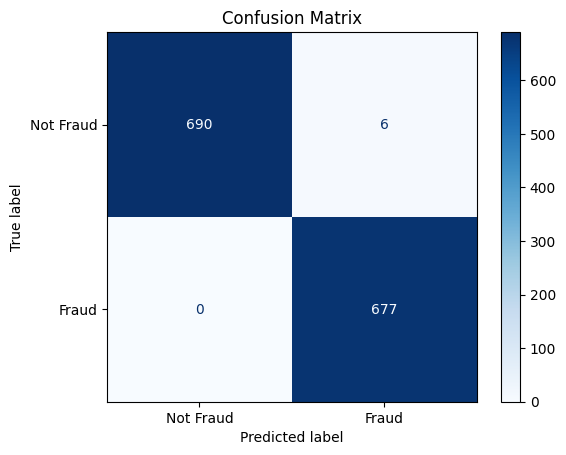

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the predictions from the trainer
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
